# Projet 5  : Segmentez des clients d'un site e-commerce

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

 

La page d'accueil du site Olist
La page d'accueil du site Olist
Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

Les données
Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

Votre mission
Votre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Vous créez donc un notebook et démarrez votre travail d’analyse exploratoire.



Après quelques premières analyses, vous vous rendez compte qu’Olist ne vous a pas fourni beaucoup de données ; vous enquêtez donc auprès de l’entreprise pour obtenir quelques informations complémentaires, et vérifier que vous avez bien compris la mission. Voici sa réponse.

 

Bonjour, 

Pour des raisons de confidentialité, nous ne pouvons pas vous fournir beaucoup de données à ce stade. Ensuite, en raison de ressources limitées, nous avons dû vous fournir l’ensemble des données, alors que seule une partie va vous intéresser. Nos dashboards internes nous indiquent en effet que seuls 3 % des clients du fichier de données partagé avec vous ont réalisé plusieurs commandes.

Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.

La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

Dans un deuxième temps, une fois le modèle de segmentation choisi, nous souhaiterions  que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.

Pour information, le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

Bien à vous,

Juan, de l’équipe Marketing

Vous réalisez donc trois autres documents afin de préparer une réponse à Olist : 

un notebook avec des essais des différentes approches de modélisation ;
un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation, afin que celui-ci reste pertinent ; 
une présentation pour un collègue afin d’obtenir ses retours sur votre approche.

# Sommaire

## I. Importation
### 1. Importation des bibliothèques
### 2. Importation des fichiers


## II. Exploration des fichiers
### 1. Fichier products 
### 2. Fichier category
### 3. Fichier sellers
### 4. Fichier geolocalisation
### 5. Fichier items
### 6. Fichier reviews
### 7. Fichier orders
### 8. Fichier payments
### 9. Fichier customers

## III. Analyse du fichier regroupé
### 1.Analyse graphique des données
### 2. Analyse et transformation de la colonne Régions
### 3. Analyse des valeurs aberrantes
### 4. Analyse statistiques


## IV. Agrégation et finalisation 
### 1. Agrégation en fonction des commandes
### 2. Agrégation en fonction des clients



# 

## I. Importation

### 1. Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import folium

import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Définition titre graphique

title = {"family": "arial",
              "color":  "black",
              "weight": "bold",
              "size": 18}

### 2. Importation des fichiers

In [3]:
# Nous allons importer l'ensemble des fichiers fournis pour notre projet

geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')


In [4]:
# Création d'une boucle afin d'obtenir les informations des différents fichiers

database = [geolocalisation, customers, items, payments, reviews, orders, products, sellers, category]

for i in database:
    print('-------------------------------------------------------')
    print(i.info)
    print('----------')
    print(i.dtypes)
          

-------------------------------------------------------
<bound method DataFrame.info of          geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_cit

In [5]:
for shape in database :
    print(shape.shape)

(1000163, 5)
(99441, 5)
(112650, 7)
(103886, 5)
(99224, 7)
(99441, 8)
(32951, 9)
(3095, 4)
(71, 2)


In [6]:
# Vérification doublons

for double in database:
    print(double.duplicated().sum())

261831
0
0
0
0
0
0
0
0


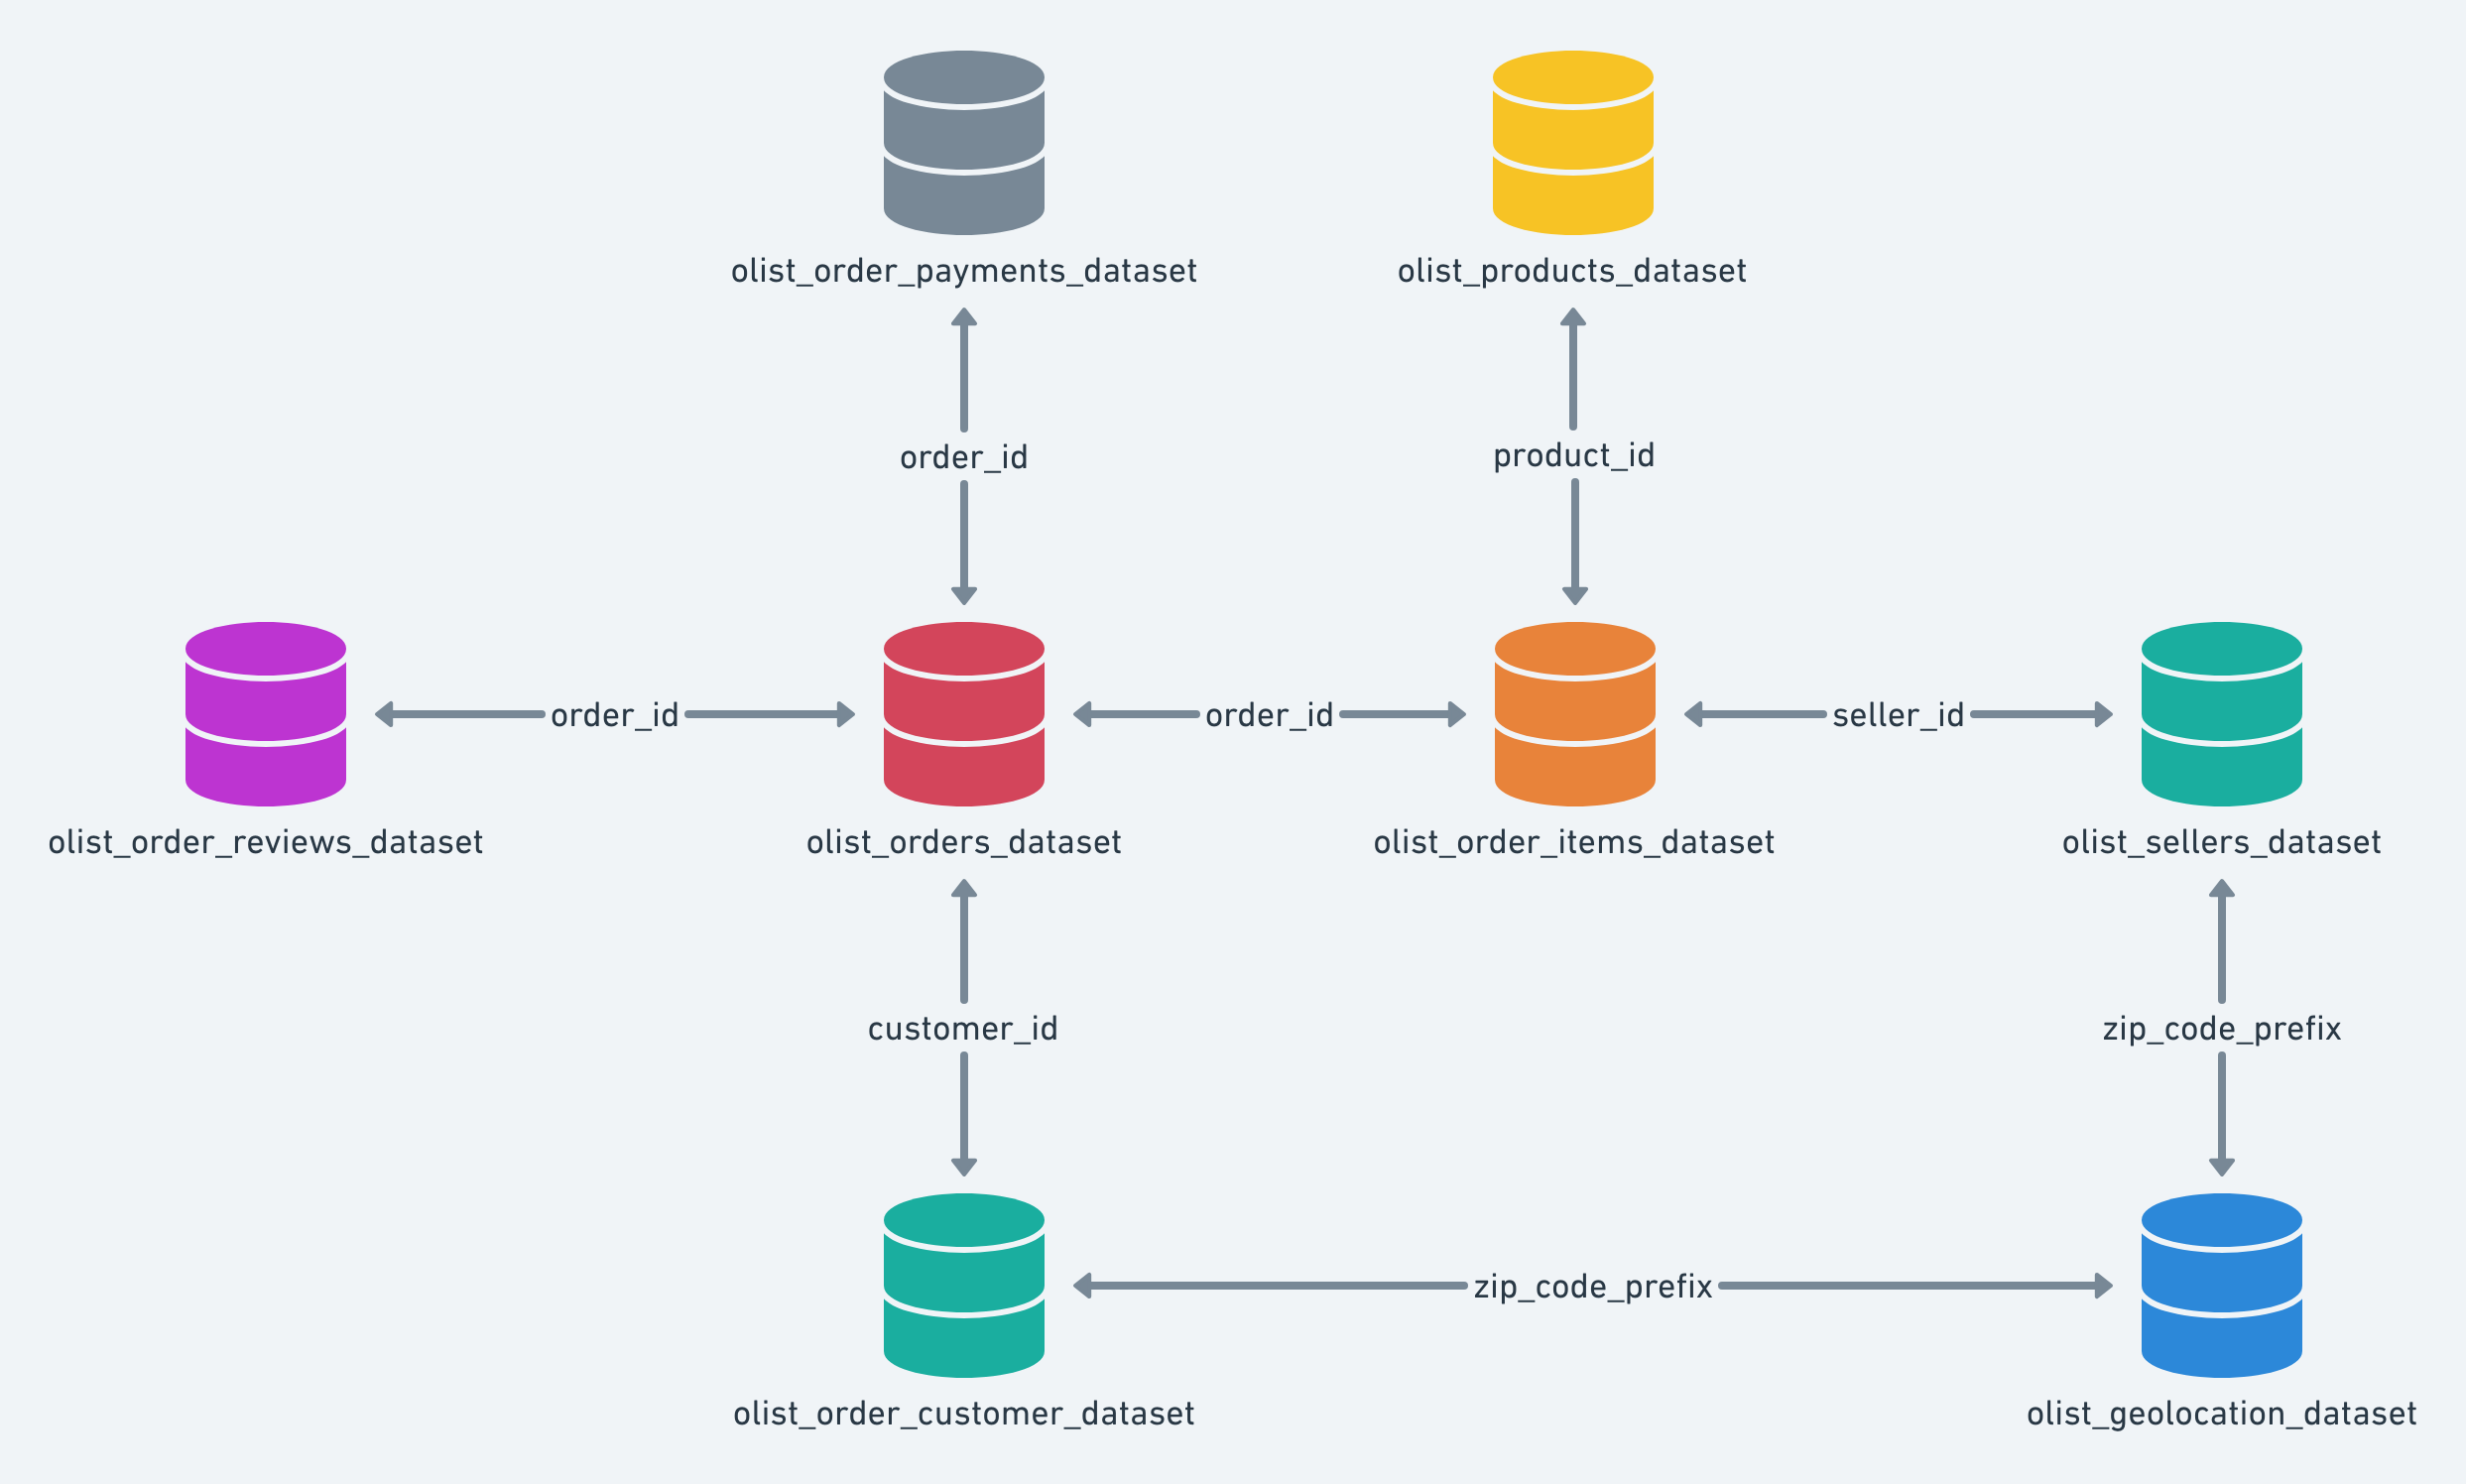

Afin d'analyser nos données, nous allons procéder à une analyse de chaque fichier.
Par la suite, nous pourrons regrouper les fichiers.

Notre rôle sera de déterminer et d'analyser le comportement des clients de l'entreprise.
Nous allons étudier le comportement de ces derniers dans un domaine marketing.

Après recherche, la méthode la plus utilisée dans ce domaine est la méthode RFM (Récence Fréquence Montant).

Notre but sera d'étudier les différents fichiers pour en ressortir des données importantes pour l'analyse du comportement.

Nous allons effectuer l'analyse de deux méthodes :
- Nous allons agrégrer selon les commandes pour la partie maintenance,
- Agréger les données selon les clients pour la modélisation.



## II. Exploration des fichiers

### 1. Fichier products

In [7]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


Ce fichier contient principalement la nature du produit (dimensions du produit, catégories, références produits, ...).

Dans ce fichier, nous allons conserver uniquement les colonnes suivantes :
- product_id,
- product_category_name

In [8]:
products.drop(columns = ['product_name_lenght', 'product_description_lenght',
                         'product_photos_qty', 'product_weight_g', 'product_length_cm',
                         'product_height_cm', 'product_width_cm'], inplace = True)

73


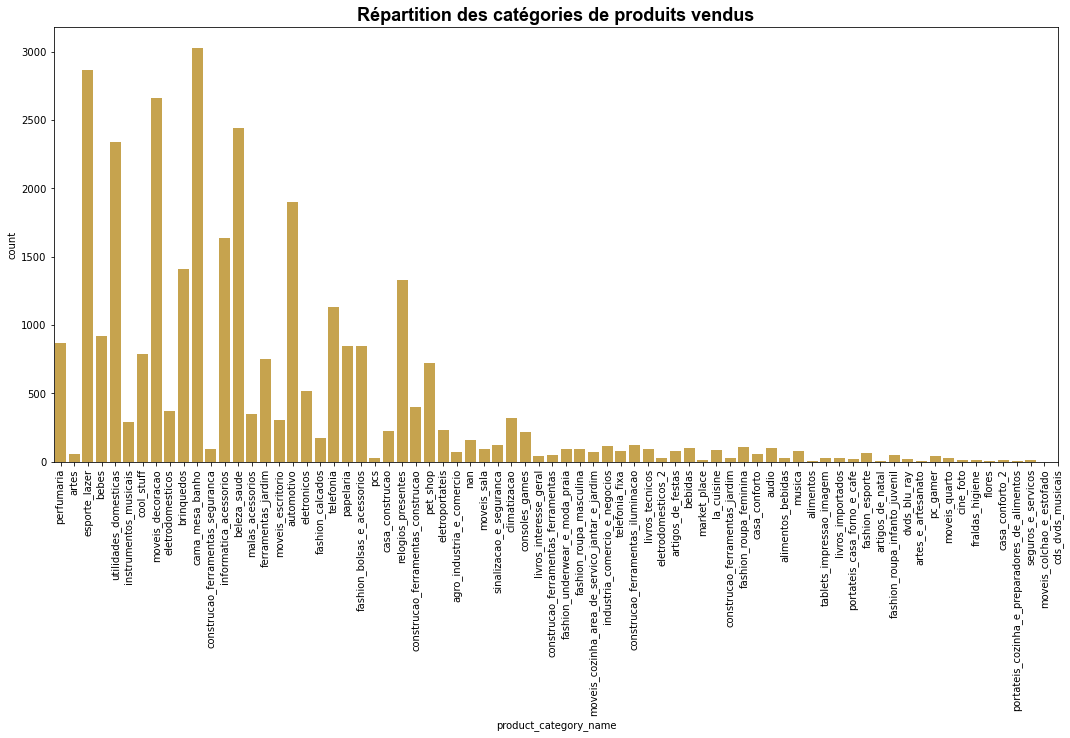

In [9]:
# Représentation des catégories de produits

print(products['product_category_name'].nunique())


plt.figure(figsize=(18, 8))
sns.countplot(data=products, x="product_category_name", color="#DAAB3A")
plt.xticks(range(0, products["product_category_name"].nunique()+1),
           products["product_category_name"].unique(),
           rotation=90)
plt.title("Répartition des catégories de produits vendus",
          fontdict=title)
plt.show()

Nous pouvons constater que nous avons 73 catégories différentes de produits avec une répartition très hétérogène.
Nous allons, par la suite, procéder à un regroupement des produits en catégories afin de diminuer ce nombre et de pouvoir effectuer une analyse plus valorisante.

### 2.Fichier category

In [10]:
category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Ici, nous pouvons constater qu'il semble nous manquer 2 catégories. Nous allons prendre la décision de modifier nos sous catégories avec utilisation de la traduction anglaise.
Pour les données manquantes, nous allons les inclure dans une catégorie 'Divers'.

In [11]:
fichier1 = pd.merge(products, category, on = 'product_category_name', how = 'left')

In [12]:
# Création de catégories à travers une proximité des mots

fichier1['Produits'] = np.where((fichier1['product_category_name_english'].str.contains("fashio|luggage")==True),
                                    'Accessory',
                           np.where((fichier1['product_category_name_english'].str.contains("health|beauty|perfum")==True),
                                    'Beauty',
                           np.where((fichier1['product_category_name_english'].str.contains("toy|baby|diaper")==True),
                                     'Baby',
                           np.where((fichier1['product_category_name_english'].str.contains("book|cd|dvd|media|sport")==True),
                                     'books_cds_media',
                           np.where((fichier1['product_category_name_english'].str.contains("grocer|food|drink")==True), 
                                     'Feeding',
                           np.where((fichier1['product_category_name_english'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'Technology',
                           np.where((fichier1['product_category_name_english'].str.contains
                                     ("home|flow|gift|stuff|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'Home',
                                     'Divers')))))))

fichier1.drop(columns = ['product_category_name_english'], inplace = True)

In [13]:
fichier1

,product_id,product_category_name,Produits
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,Beauty
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,Divers
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,books_cds_media
3,cef67bcfe19066a932b7673e239eb23d,bebes,Baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,Home
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,Home
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,Divers
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,Home
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,Technology


8


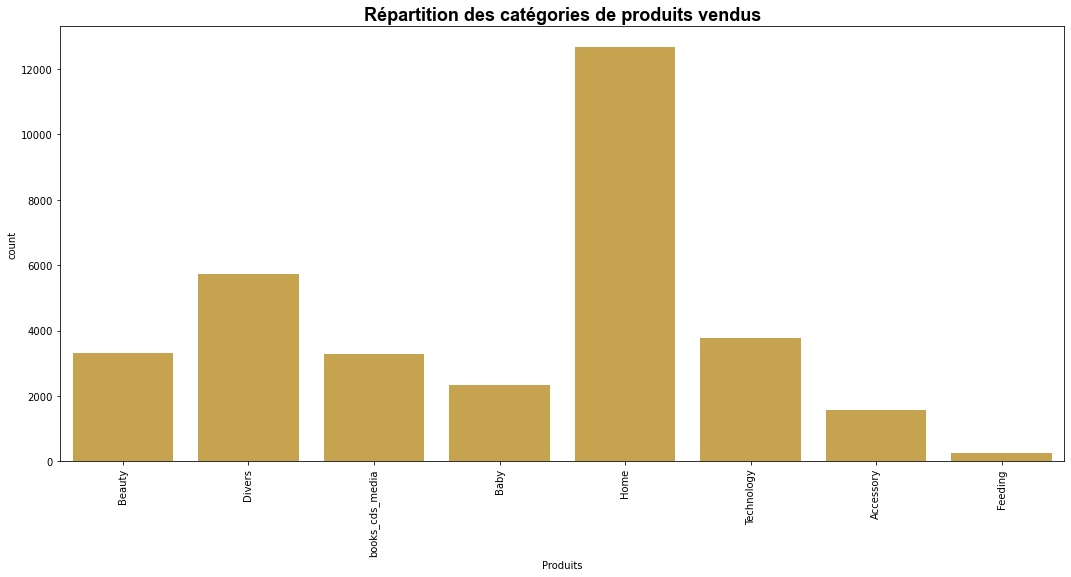

In [14]:
# Représentation des catégories de produits

print(fichier1['Produits'].nunique())


plt.figure(figsize=(18, 8))
sns.countplot(data=fichier1, x="Produits", color="#DAAB3A")
plt.xticks(range(0, fichier1["Produits"].nunique()),
           fichier1["Produits"].unique(),
           rotation=90)
plt.title("Répartition des catégories de produits vendus",
          fontdict=title)
plt.show()

Notre regroupement a permis de passer de 73 catégories difficilement lisible à 8 catégories plus cohérentes.
Nous constatons très rapidement que la catégorie des produits pour la maison sont les plus consommés.
Cette catégorie regroupe notamment les deux produits les plus consommés.

Par la suite, nous pourrons analyser la répartition du chiffre d'affaires selon les catégories de produits.

Toutefois, nous pouvons estimer que cette colonne a un faible intérêt pour notre modélisation. Nous la supprimerons à l'étape de l'agrégation.

### 3. Fichier sellers

In [15]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


Ce fichier contient la référence ainsi que la localisation des vendeurs de l'entreprise.

Ce dernier ne sera utile pour notre projet de segmentation de la clientèle, nous n'allons pas l'étudier.

### 4. Fichier geolocalisation

In [16]:
geolocalisation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


Ce fichier ne contient que des données géographiques.
Egalement, nous n'allons pas utiliser ce dernier pour la suite de notre projet.

### 5. Fichier items

In [17]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Ce fichier contient la réference des articles vendus et des commandes mais également les prix.

Ce dernier est essentiel pour notre analyse, nous allons uniquement supprimer les colonnes seller_id et shipping_limit_date.


In [18]:
items.drop(columns = ['seller_id', 'shipping_limit_date'], inplace = True)

In [19]:
# Analyse du nombre de commandes

items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [20]:
fichier1 = pd.merge(fichier1, items, on = 'product_id', how = 'left')

fichier1

,product_id,product_category_name,Produits,order_id,order_item_id,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,Beauty,e17e4f88e31525f7deef66779844ddce,1,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,Divers,5236307716393b7114b53ee991f36956,1,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,books_cds_media,01f66e58769f84129811d43eefd187fb,1,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,Baby,143d00a4f2dde4e0364ee1821577adb3,1,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,Home,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90,8.29
...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,Technology,59e88b7d3675e89aceaf86f372d3bc9a,2,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,Technology,6e4465d771f02e4fe335225de3c6c043,1,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,Technology,6e4465d771f02e4fe335225de3c6c043,2,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,Technology,6e4465d771f02e4fe335225de3c6c043,3,29.90,23.28


In [21]:
fichier1 = fichier1.groupby(['order_id']).agg({'order_item_id':'count',
                                 'product_id': 'count',
                                 'price': 'sum',
                                 'freight_value': 'sum',
                                   'Produits': lambda x:x.value_counts().index[0]})

Le fait d'agréger nos données confirme bien notre nombre de lignes. Nous allons continuer avec l'analyse des différents fichiers.

In [22]:
# Analyse du nombre de commandes

fichier1['order_item_id'].value_counts()

1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
10        8
12        5
11        4
9         3
15        2
14        2
20        2
13        1
21        1
Name: order_item_id, dtype: int64

Nous pouvons ici constater qu'une très forte majorité des commandes sont uniques.
Seul quelques clients effectuent plusieurs commandes.

### 6. Fichier reviews

In [23]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Ce fichier contient une donnée très importante, à savoir les commentaires des clients.

Dans ce dataframe, nous avons principalement la note des clients, la référence des commandes et commentaires mais également des données secondaires comme un message avec le commentaire mais aussi la date.

Notre objectif étant d'analyser le comportement des clients, nous allons supprimer les variables non utiles pour notre projet.

Ensuite, nous allons également agréger en fonction des commandes pour vérifier le nombre de lignes.

Puis, nous allons intégrer le fichier avec notre fichier central.

In [24]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [25]:
reviews.drop(columns = ['review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'], inplace = True)


In [26]:
# Analyse des notes

reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

<Figure size 1008x576 with 0 Axes>

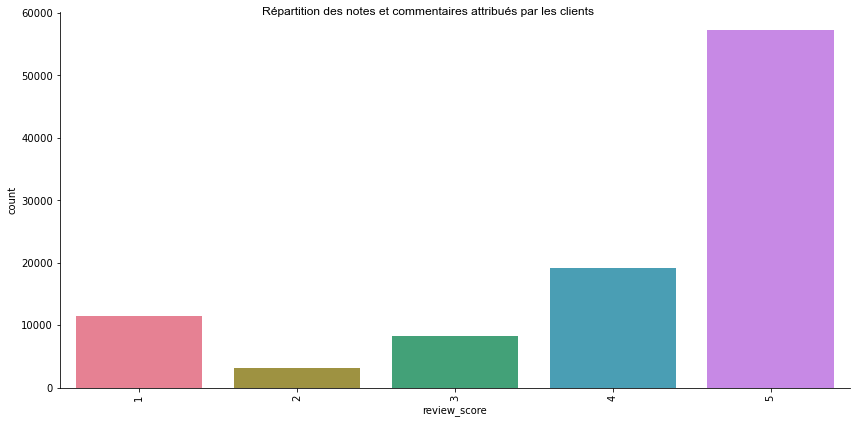

In [27]:
# Visualisation des notes

plt.figure(figsize=(14, 8))
g = sns.catplot(data=reviews, x="review_score", kind="count", height=6, aspect=2, palette="husl")
g.set_xticklabels(rotation=90)
g.fig.suptitle("Répartition des notes et commentaires attribués par les clients", fontdict=title)
plt.show()

In [28]:
reviews.groupby(['order_id']).agg({'review_id': 'count',
                                   'review_score': 'mean'})

,review_id,review_score
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,1,5.0
00018f77f2f0320c557190d7a144bdd3,1,4.0
000229ec398224ef6ca0657da4fc703e,1,5.0
00024acbcdf0a6daa1e931b038114c75,1,4.0
00042b26cf59d7ce69dfabb4e55b4fd9,1,5.0
...,...,...
fffc94f6ce00a00581880bf54a75a037,1,5.0
fffcd46ef2263f404302a634eb57f7eb,1,5.0
fffce4705a9662cd70adb13d4a31832d,1,5.0


Nous pouvons ici constater un écart entre le fichier central et notre fichier des commentaires.

Nous allons vérifier s'il n'y a pas de doublons.

In [29]:
# Regroupement

fichier1 = pd.merge(fichier1, reviews, on = 'order_id', how = 'left')

fichier1 = fichier1.groupby(['order_id']).agg({'order_item_id': 'count',
                                   'price' : 'sum',
                                   'freight_value' : 'sum',
                                   'review_score' : 'mean',
                                   'Produits': lambda x:x.value_counts().index[0]})

fichier1

,order_item_id,price,freight_value,review_score,Produits
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,5.0,Home
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,4.0,Divers
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,5.0,Home
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,4.0,Beauty
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,5.0,Home
...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,299.99,43.41,5.0,Home
fffcd46ef2263f404302a634eb57f7eb,1,350.00,36.53,5.0,Technology
fffce4705a9662cd70adb13d4a31832d,1,99.90,16.95,5.0,books_cds_media


### 7. Fichier orders

In [30]:
print(orders['order_id'].nunique())
print(orders['order_status'].unique())

99441
['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


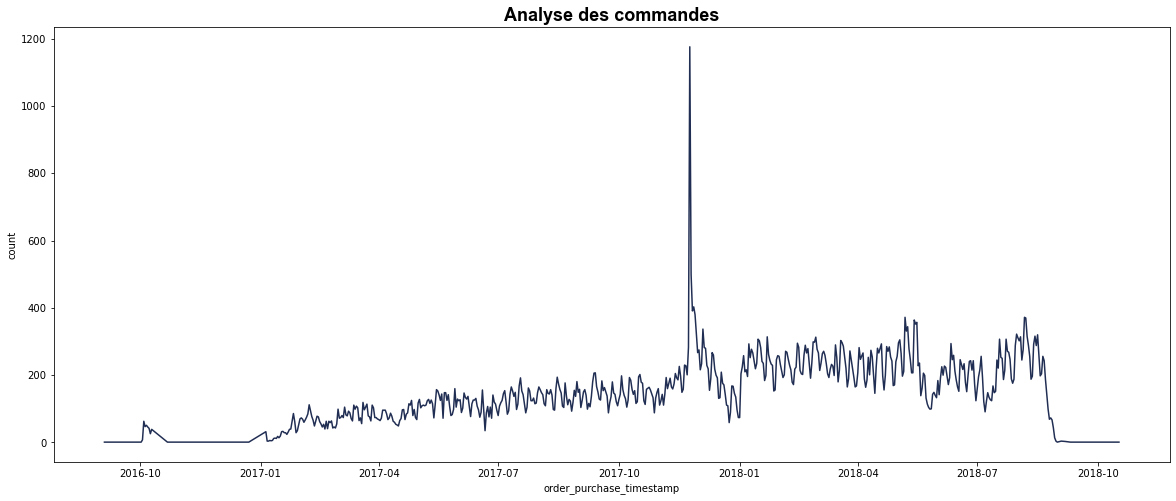

In [31]:
time_series = orders.groupby(orders["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
plt.figure(figsize=(20, 8))
ax = time_series.plot(color="#212E53")
ax.set_ylabel("count")
plt.title("Analyse des commandes",
          fontdict=title)
plt.show()

Ce fichier est le point central des commandes des clients.
En effet, ce dernier précise l'ensemble des détails de la commande (état de la commande, date de commande, de délivrance, ...).

Notre objectif étant d'analyser le comportement des clients, nous allons conserver uniquement les variables essentiels.

A travers notre graphique, nous constatons que certaines périodes ne présentent aucun ou très peu de données.
Par la suite, nous pourrons procéder à un filtre dans le but de pouvoir étudier une période avec plus de données.


In [32]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [33]:
orders.drop(columns = ['order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace = True)

In [34]:
# Regroupement

fichier1 = pd.merge(orders, fichier1, on = 'order_id', how = 'left')

In [35]:
fichier1

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,price,freight_value,review_score,Produits
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,29.99,8.72,4.0,Home
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,118.70,22.76,4.0,Beauty
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,159.90,19.22,5.0,Divers
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,45.00,27.20,5.0,Divers
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,19.90,8.72,5.0,Divers
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,1.0,72.00,13.08,5.0,Beauty
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,1.0,174.90,20.10,4.0,Baby
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,1.0,205.99,65.02,5.0,Home
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,1.0,359.98,81.18,2.0,Technology


<AxesSubplot:>

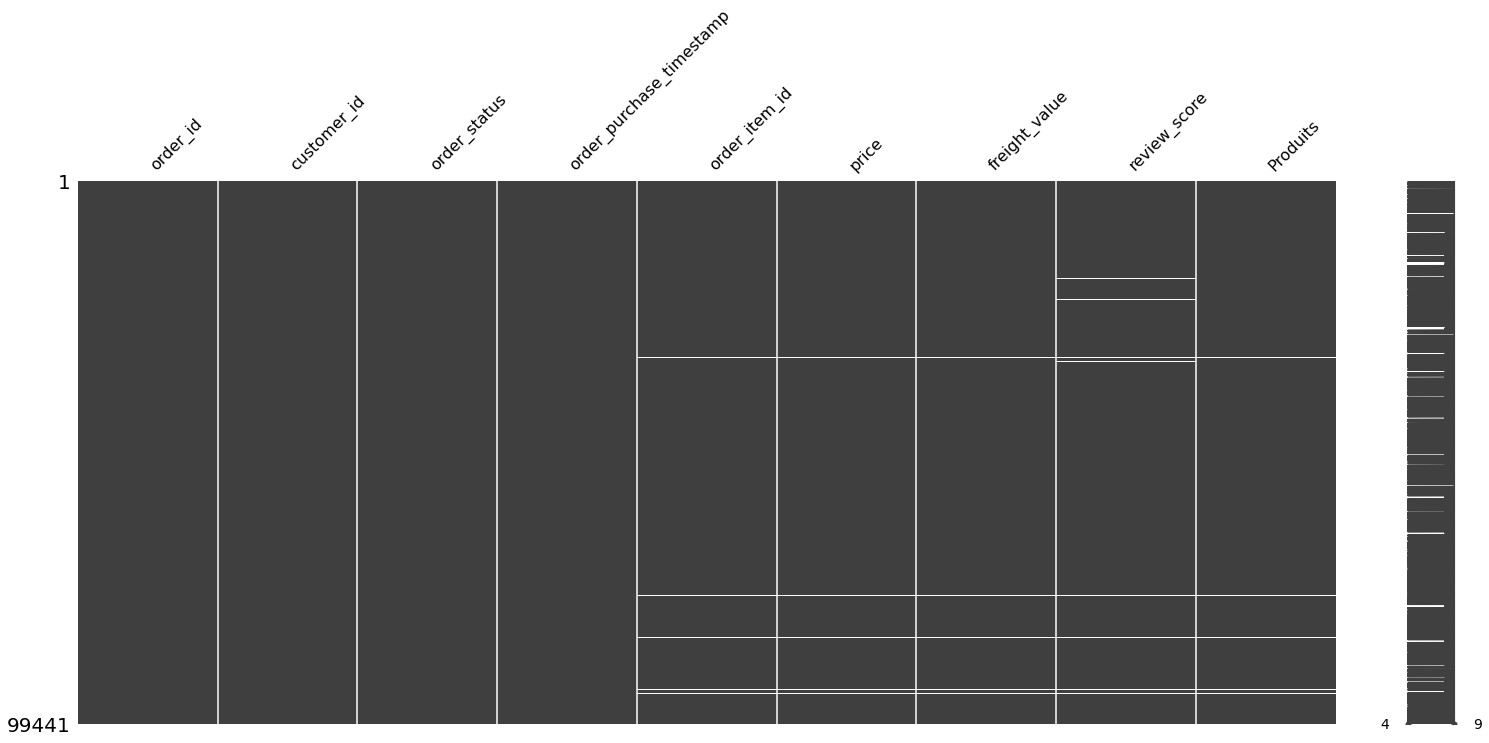

In [36]:
msno.matrix(fichier1)

### 8. Fichier payments

In [37]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Ce fichier nous donne des informations très pertinentes comme le type de paiement, la durée du paiement, la  présence d'un acompte et le montant total.

Ce fichier sera incorporé dans notre base de données.

In [38]:
payments = payments.groupby(['order_id']).agg({'payment_sequential': 'count',
                                   'payment_installments': 'count',
                                   'payment_value' : 'sum',
                                    'payment_type': lambda x:x.value_counts().index[0]})

In [39]:
payments

,payment_sequential,payment_installments,payment_value,payment_type
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,72.19,credit_card
00018f77f2f0320c557190d7a144bdd3,1,1,259.83,credit_card
000229ec398224ef6ca0657da4fc703e,1,1,216.87,credit_card
00024acbcdf0a6daa1e931b038114c75,1,1,25.78,credit_card
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,218.04,credit_card
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,343.40,boleto
fffcd46ef2263f404302a634eb57f7eb,1,1,386.53,boleto
fffce4705a9662cd70adb13d4a31832d,1,1,116.85,credit_card


Pour ce troisième contrôle, nous pouvons également remarquer que cette colonne ne présente pas de doublons mais une utilisation différente de la commande.

Par conséquent, nous n'avons pas une présence de doublons mais uniquement une utilisation différente pour la commande.

Nous allons procéder au regroupement de notre fichier.

In [40]:
# Regroupement

fichier1 = pd.merge(fichier1, payments, on = 'order_id', how = 'inner')

fichier1

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,price,freight_value,review_score,Produits,payment_sequential,payment_installments,payment_value,payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,29.99,8.72,4.0,Home,3,3,38.71,voucher
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,118.70,22.76,4.0,Beauty,1,1,141.46,boleto
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,159.90,19.22,5.0,Divers,1,1,179.12,credit_card
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,45.00,27.20,5.0,Divers,1,1,72.20,credit_card
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,19.90,8.72,5.0,Divers,1,1,28.62,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99435,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,1.0,72.00,13.08,5.0,Beauty,1,1,85.08,credit_card
99436,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,1.0,174.90,20.10,4.0,Baby,1,1,195.00,credit_card
99437,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,1.0,205.99,65.02,5.0,Home,1,1,271.01,credit_card
99438,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,1.0,359.98,81.18,2.0,Technology,1,1,441.16,credit_card


Notre nombre de lignes reste identique avec notre agrégation.

A présent, nous allons procéder à un filtre de nos données à travers la date mais aussi sur le statut de la commande.

Pour cela, nous allons conserver les dates entre le 01/01/2017 et le 31/08/2018

Ensuite, nous pourrons procéder à l'exportation de notre premier fichier pour la maintenance de notre projet.

### 9. Fichier customers

In [41]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [42]:
customers.drop(columns = ['customer_zip_code_prefix',
       'customer_city'], inplace = True)

In [43]:
fichier1 = pd.merge(customers, fichier1, on = 'customer_id', how = 'left')

In [44]:
# Sélection des commandes délivrées
fichier1 = fichier1[fichier1['order_status'] == 'delivered']


# Sélection de la plage de date entre le 01/01/2017 et le 31/08/2018
fichier1= fichier1[(fichier1["order_purchase_timestamp"] >= '2017-01-01') & (fichier1["order_purchase_timestamp"] <= '2018-08-30')]

fichier1

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,price,freight_value,review_score,Produits,payment_sequential,payment_installments,payment_value,payment_type
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,124.99,21.88,4.0,Home,1.0,1.0,146.87,credit_card
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,289.00,46.48,5.0,Home,1.0,1.0,335.48,credit_card
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,139.94,17.79,5.0,Home,1.0,1.0,157.73,credit_card
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,149.94,23.36,5.0,Home,1.0,1.0,173.30,credit_card
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,230.00,22.25,5.0,Home,1.0,1.0,252.25,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1.0,74.90,13.88,4.0,books_cds_media,1.0,1.0,88.78,credit_card
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1.0,114.90,14.16,5.0,books_cds_media,1.0,1.0,129.06,credit_card
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1.0,37.00,19.04,1.0,Beauty,1.0,1.0,56.04,credit_card
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,1.0,689.00,22.07,5.0,Home,1.0,1.0,711.07,credit_card


Nous avons procédé au regroupement des différents fichiers.

A présent, nous allons finaliser notre analyse des différentes colonnes puis procéder à la création des variables pertinentes pour notre projet.

Enfin, nous pourrons procéder à l'agrégation en fonction des commandes pour la maintenance puis ensuite en fonction des clients pour notre modélisation.

## III. Analyse du fichier regroupé

### 1.Analyse graphique des données

In [45]:
# Création variable Total_paiements

fichier1['Total_paiements'] = fichier1['price'] + fichier1['freight_value']

fichier1.drop(columns = ['price', 'freight_value', 'payment_value'], inplace = True)

In [46]:
fichier1

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,review_score,Produits,payment_sequential,payment_installments,payment_type,Total_paiements
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,4.0,Home,1.0,1.0,credit_card,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,5.0,Home,1.0,1.0,credit_card,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,5.0,Home,1.0,1.0,credit_card,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,5.0,Home,1.0,1.0,credit_card,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,5.0,Home,1.0,1.0,credit_card,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1.0,4.0,books_cds_media,1.0,1.0,credit_card,88.78
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1.0,5.0,books_cds_media,1.0,1.0,credit_card,129.06
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1.0,1.0,Beauty,1.0,1.0,credit_card,56.04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,1.0,5.0,Home,1.0,1.0,credit_card,711.07


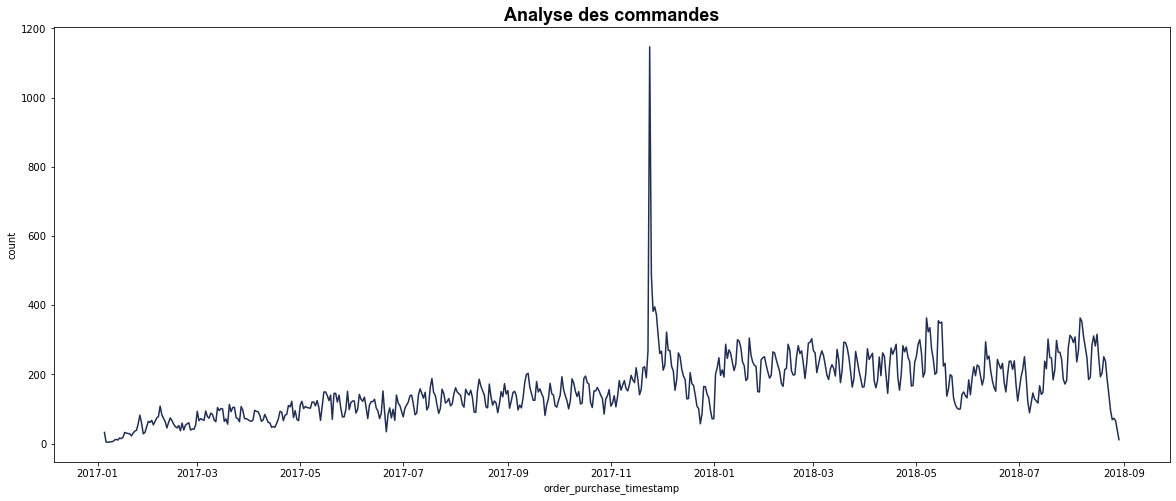

In [47]:
time_series = fichier1.groupby(fichier1["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
plt.figure(figsize=(20, 8))
ax = time_series.plot(color="#212E53")
ax.set_ylabel("count")
plt.title("Analyse des commandes",
          fontdict=title)
plt.show()

Nous avons bien procédé à une sélection plus précise concernant notre période d'analyse.
Nous constatons une forte hausse des ventes entre novembre et janvier, ceci est liée à la période des fêtes de Noel et de fin d'année.

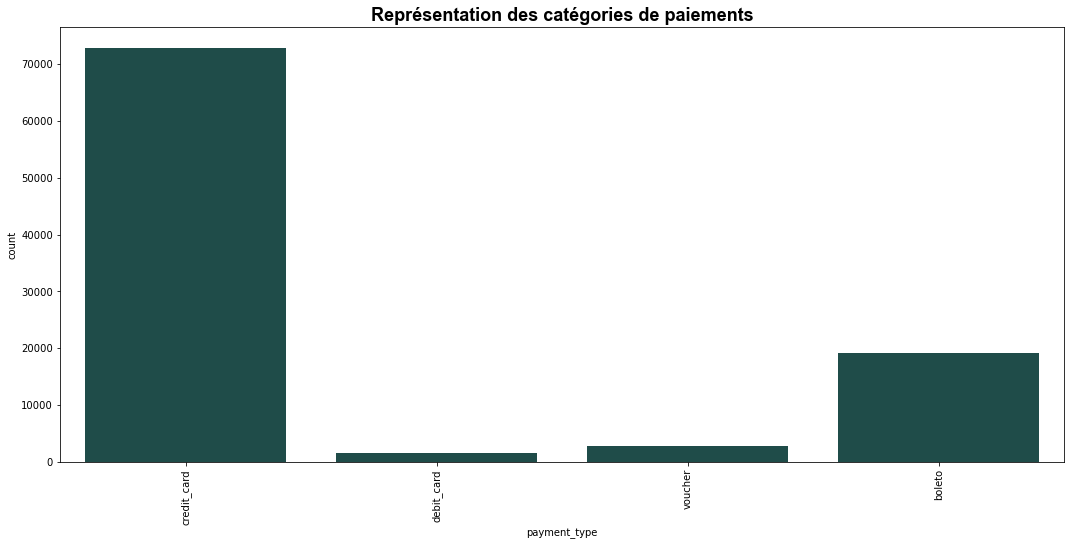

In [48]:
# Analyse des catégories après traitement

plt.figure(figsize=(18, 8))
sns.countplot(data=fichier1, x='payment_type',
              color="#18534F")
plt.xticks(range(0, fichier1['payment_type'].nunique()),
           fichier1['payment_type'].unique(),
           rotation=90)
plt.title("Représentation des catégories de paiements",
          fontdict=title)
plt.show()

Text(0.5, 1.0, "Chiffre d'affaires moyen par méthodes de paiements")

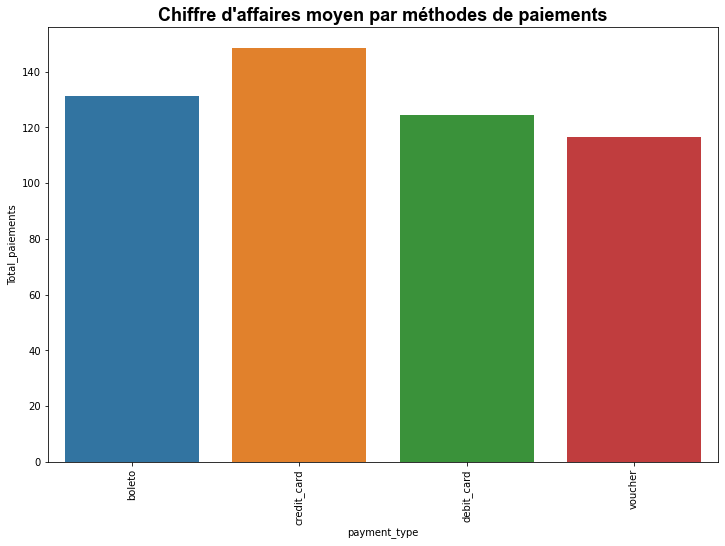

In [49]:
# Analyse du chiffre d'affaires moyen par méthodes de paiements

grouped_data = fichier1[fichier1["Total_paiements"]<1000].groupby("payment_type")["Total_paiements"].mean().reset_index()

fig = plt.figure(figsize=(12,8))

sns.barplot(x="payment_type", y="Total_paiements", data=grouped_data)
plt.xticks(rotation=90)
plt.title("Chiffre d'affaires moyen par méthodes de paiements", fontdict = title)

Text(0.5, 1.0, "Chiffre d'affaires par moyens de paiements")

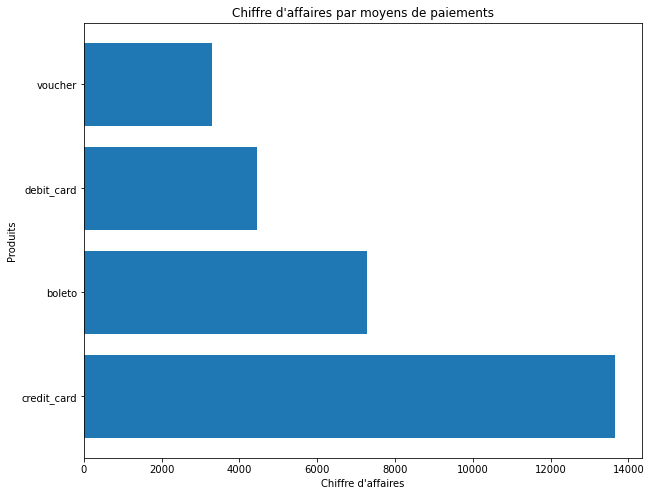

In [50]:
# Chiffre d'affaires par catégories de produits

# trier le dataframe par chiffre d'affaires décroissant
df = fichier1.sort_values(by='Total_paiements', ascending=False)

# créer un graphique en barres horizontales
plt.figure(figsize = (10,8))
plt.barh(df['payment_type'], df['Total_paiements'])

# ajouter des labels et un titre
plt.xlabel('Chiffre d\'affaires')
plt.ylabel('Produits')
plt.title('Chiffre d\'affaires par moyens de paiements')


Pour la colonne des moyens de paiements, nous pouvons constater qu'une très grande majorité des opérations se font par carte à débit immédiat (credit_card) tandis que les autres moyens de paiements sont très peu utilisés notamment la carte à débit différé (débit_card). Etant sur une plateforme de E-commerce, cette donnée est plutôt cohérente.

Toutefois, nous remarquons que le chiffre d'affaires moyen tend à équilibrer (la carte à débit immédiat reste supérière mais assez proche des autres autres moyens de paiements.

Enfin, le graphique sur le chiffre d'affaires total est assez représentatif avec une majorité avec la carte de crédit tandis que les espèces et carte de débit sont assez proches.

Cette variable ne sera pas conservée. En effet, nous avons un déséquilibre trop important sur l'utilisation des moyens de paiement.
De plus, nous ne connaissons pas la méthode de fonctionnement pour un paiement sur le site (conditions pour les espèces ou les bons, normes bancaires au Brésil pour les cartes à débit différé).
Toutefois, cette variable est intéressante pour obtenir des informations pertinentes sur l'entité.

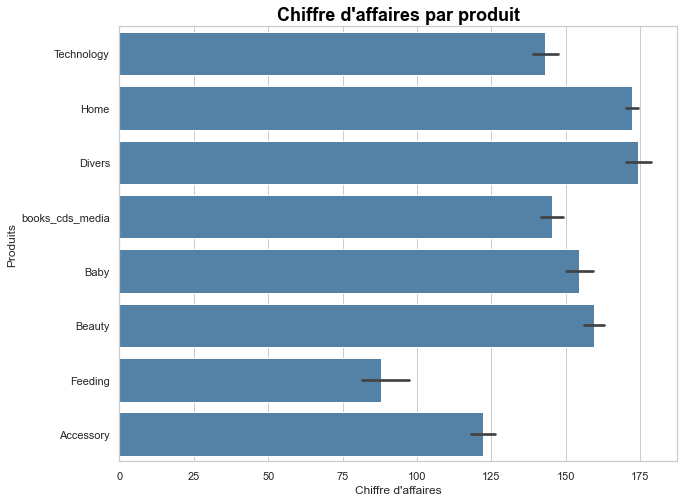

In [51]:
# Analyse chiffre d'affaires moyen par catégories de produits

# trier le dataframe par chiffre d'affaires décroissant
df = fichier1.sort_values(by='Total_paiements', ascending=False)

# création du graphique avec Seaborn
plt.figure(figsize = (10,8))
sns.set(style='whitegrid')
graph = sns.barplot(x='Total_paiements', y='Produits', data=df, color='steelblue')

# personnalisation des labels et du titre
graph.set_xlabel('Chiffre d\'affaires')
graph.set_ylabel('Produits')
graph.set_title('Chiffre d\'affaires par produit', fontdict = title)

# afficher le graphique
plt.show()

Lors de notre exploration initiale, nous avions constaté que les catégories 'Home' et 'Divers' concentraient une majorité du chiffre d'affaires.
Nous constatons que le chiffre d'affaires moyen par produits est assez cohérent.
Les produits technologiques et culturels sont également bien présents dans le chiffre d'affaires moyen.


### 2. Analyse et transformation de la colonne Régions

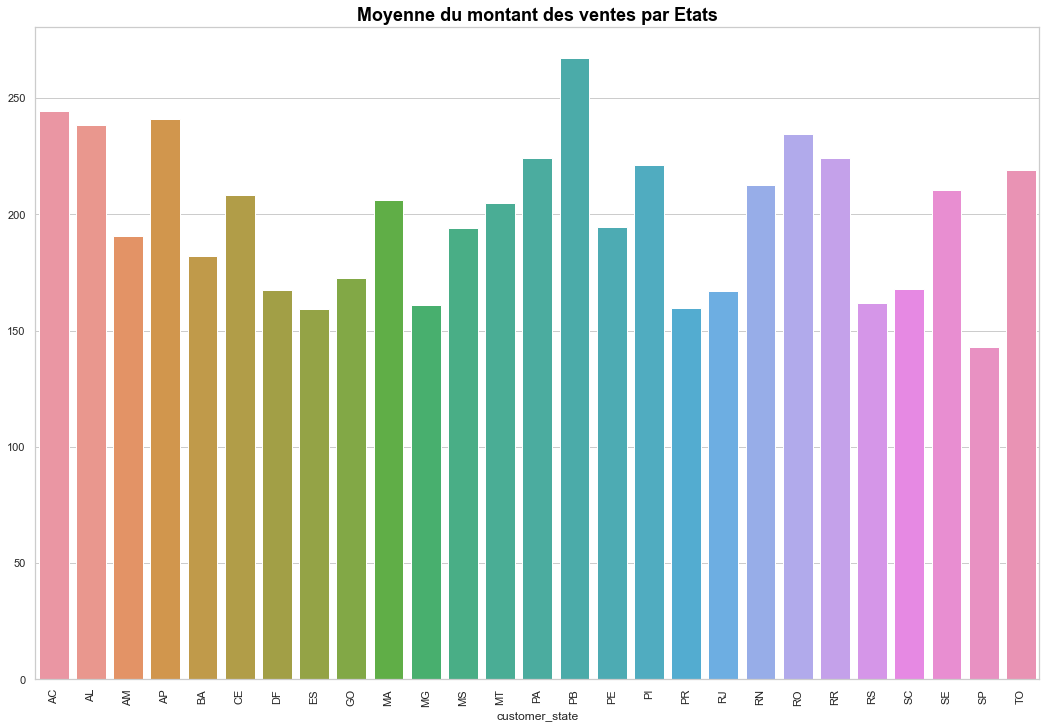

In [52]:
# Analyse colonne customer_state

fichier1['customer_state'].unique()

# Regrouper les données par état de client et calculer la moyenne des prix pour chaque groupe
mean_price_by_state = fichier1.groupby("customer_state")["Total_paiements"].mean()

# Tracer un barplot des moyennes des prix par état de client
fig, ax = plt.subplots(figsize=(18,12))
sns.barplot(x=mean_price_by_state.index, y=mean_price_by_state.values)
plt.xticks(rotation=90)
plt.title('Moyenne du montant des ventes par Etats', fontdict = title)

plt.show()

In [53]:
# Sélectionner de la page Wikipédia pour renommer les abréviations en nom d'Etat

wiki = "https://fr.wikipedia.org/wiki/%C3%89tats_du_Br%C3%A9sil"
regions = pd.read_html(wiki)[1].set_index("Abréviation")
regions.head(10)

,Drapeau,État,Capitale,Superficie (km²),Population (2014),Densité (2005),PIB (% du total) (2007),PIB en PPA (US$) (2007),IDH (2005),Alphabétisation (2003),Mortalité infantile (2002),Espérance de vie (2004)
Abréviation,,,,,,,,,,,,
AC,NaN,Acre,Rio Branco,"152 581,4",795 145,430,"5 761 000 (0,2 %)",8 789,751,84 %,"33,2‰",708
AL,NaN,Alagoas,Maceió,"27 767,7",3 327 551,10861,"17 793 000 (0,7 %)",5 858,677,70 %,"57,7‰",660
AP,NaN,Amapá,Macapá,"142 814,6",756 500,416,"6 022 000 (0,2 %)",10 254,780,91 %,"24,9‰",698
AM,NaN,Amazonas,Manaus,"1 570 745,7",3 893 763,205,"42 023 000 (1,6 %)",13 043,780,94 %,"20,8‰",734
BA,NaN,Bahia,Salvador,"564 692,7",15 150 143,2446,"109 652 000 (4,1 %)",7 787,742,79 %,"38,7‰",714
CE,NaN,Ceará,Fortaleza,"148 825,6",8 867 448,5440,"50 331 000 (1,9 %)",6 149,723,78 %,"35,1‰",696
DF,NaN,District fédéral,Brasilia,"5 822,1",2 867 869,40073,"99 946 000 (3,8 %)",40 696,874,96 %,"17,5‰",749
ES,NaN,Espírito Santo,Vitória,"46 077,5",3 894 899,7397,"60 340 000 (2,3 %)",18 003,802,90 %,"20,9‰",731
GO,NaN,Goiás,Goiânia,"340 086,7",6 551 322,1652,"65 210 000 (2,5 %)",11 548,800,90 %,"20,7‰",728


In [54]:
data_etat = pd.merge(fichier1.reset_index(), regions[["État"]],
                how="left",
                left_on="customer_state",
                right_on="Abréviation")
fichier1.drop("customer_state", axis=1, inplace=True)
data = fichier1.rename(columns={"État": "customer_state"})

Nous avons ici procédé à la modification du nom des régions.
Ici, nous allons effectuer le regroupement des différents états en plusieurs régions :

- la région Centre-Ouest, qui regroupe les États du Goiás, du Mato Grosso et du Mato Grosso do Sul, ainsi que le District fédéral. Elle compte environ 12 millions d'habitants sur 1,60 million de km² (19 % du territoire national). La région est principalement formée de hauts-plateaux, couverts d'une végétation de cerrado. Elle comporte également la dépression du Pantanal.

- la région Nord-Est, qui regroupe les États du Maranhão, du Piauí, du Ceará, du Rio Grande do Norte, de la Paraíba, du Pernambouc, de l'Alagoas, du Sergipe et de Bahia. Elle compte environ 50 millions d'habitants (les nordestins) sur 1,56 million de km² (18 % du territoire national). Elle comporte une bande littorale donnant sur un vaste plateau central semi-aride, le sertão.


- la région Nord, qui regroupe les États de l'Acre, de l'Amazonas, du Roraima, du Rondônia, du Pará, de l'Amapá et du Tocantins. Elle compte environ 14 millions d'habitants sur 3,85 millions de km² (45 % du territoire national). La région s'étend sur la partie brésilienne du bassin amazonien et elle est principalement couverte de forêt tropicale humide.


- la région Sud-Est, qui regroupe les États du Minas Gerais, de l'Espírito Santo, de Rio de Janeiro et de São Paulo. Elle compte environ 77 millions d'habitants sur 0,93 million de km² (11 % du territoire national). Il s'agit de la région la plus peuplée et la plus développée économiquement du pays. Elle comporte les trois plus grandes villes du Brésil, São Paulo, Rio de Janeiro et Belo Horizonte.


- la région Sud, qui regroupe les États du Paraná, de Santa Catarina et du Rio Grande do Sul. Elle compte environ 26 millions d'habitants sur 0,58 million de km² (7 % du territoire national). La région comporte également une bande littorale donnant sur un plateau intérieur couvert de forêts et parcouru de nombreux cours d'eau appartenant aux bassins des fleuves Uruguay et Paraná.

Source : Wikipédia
URL : https://fr.wikipedia.org/wiki/R%C3%A9gions_du_Br%C3%A9sil

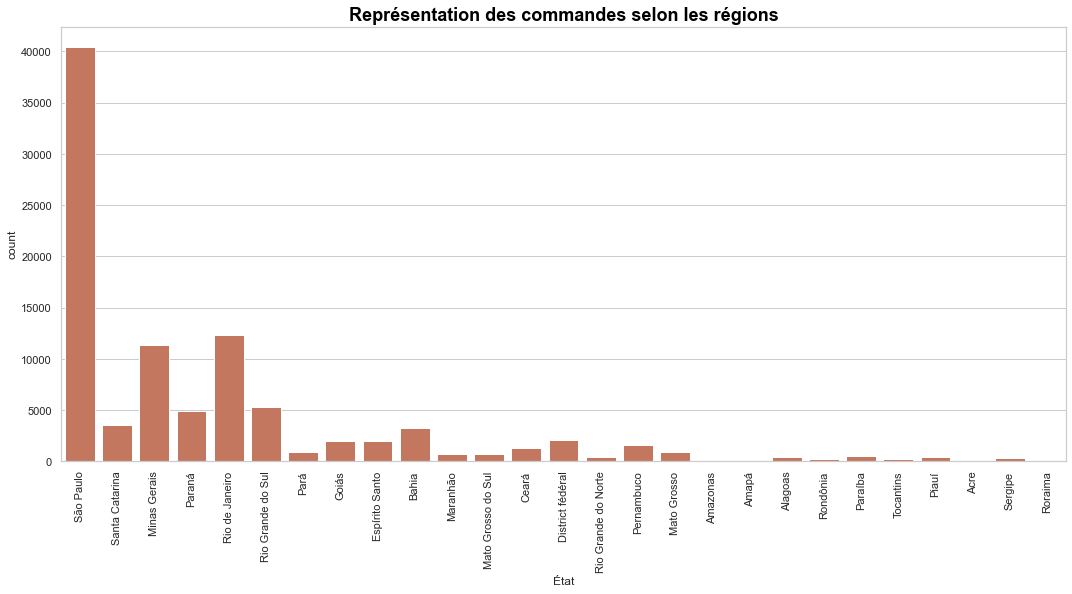

In [55]:
plt.figure(figsize=(18, 8))
sns.countplot(data=data_etat, x='État',
              color="#D46F4D")
plt.xticks(range(0, data_etat['État'].nunique()),
           data_etat['État'].unique(),
           rotation=90)
plt.title('Représentation des commandes selon les régions',
          fontdict=title)
plt.show()

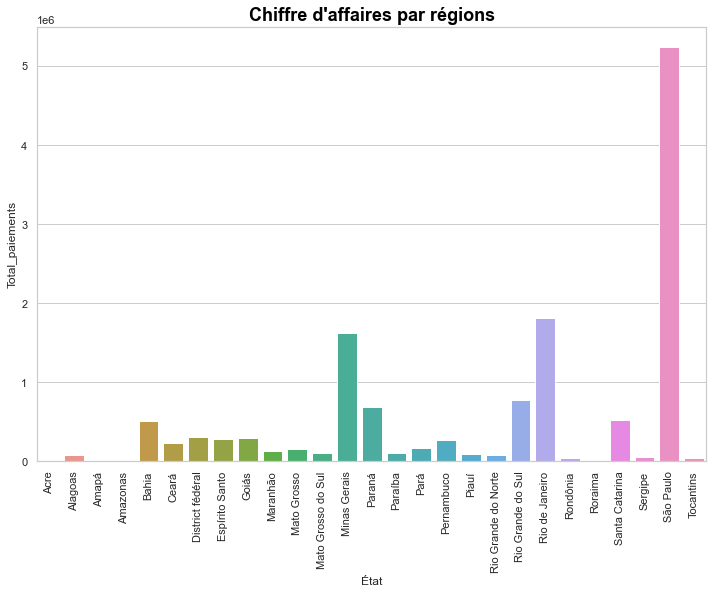

In [56]:
grouped_data = data_etat[data_etat["Total_paiements"]<1000].groupby("État")["Total_paiements"].sum().reset_index()

fig = plt.figure(figsize=(12,8))

sns.barplot(x="État", y="Total_paiements", data=grouped_data)
plt.xticks(rotation=90)
plt.title("Chiffre d'affaires par régions", fontdict = title)

plt.show()

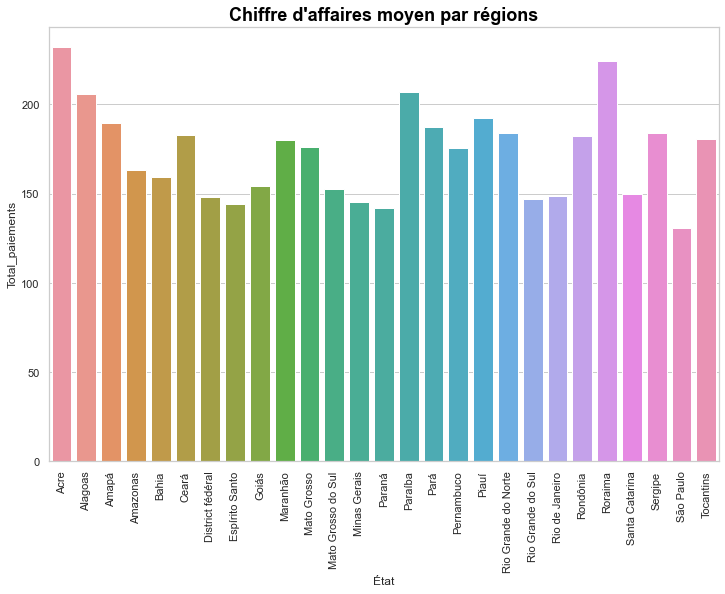

In [57]:
grouped_data = data_etat[data_etat["Total_paiements"]<1000].groupby("État")["Total_paiements"].mean().reset_index()

fig = plt.figure(figsize=(12,8))

sns.barplot(x="État", y="Total_paiements", data=grouped_data)
plt.xticks(rotation=90)
plt.title("Chiffre d'affaires moyen par régions", fontdict = title)

plt.show()

Quand nous analysons les données concernant les régions, il s'avère que le chiffre d'affaires est très fortement lié à la région de Sao Paulo mais également à plus faible proportion pour Rio de Janeiro et Minas Gerais. Cela confirme bien que ces régions sont les principales régions économiques et démographiques.
Toutefois, le chiffre d'affaires moyen est plus homogène.

Nous n'allons pas conserver cette variable pour notre analyse. Cette dernière est liée à une analyse géographique et économique.

### 3. Analyse des valeurs aberrantes

Text(0.5, 1.0, 'Analyse de la colonne Total_paiements')

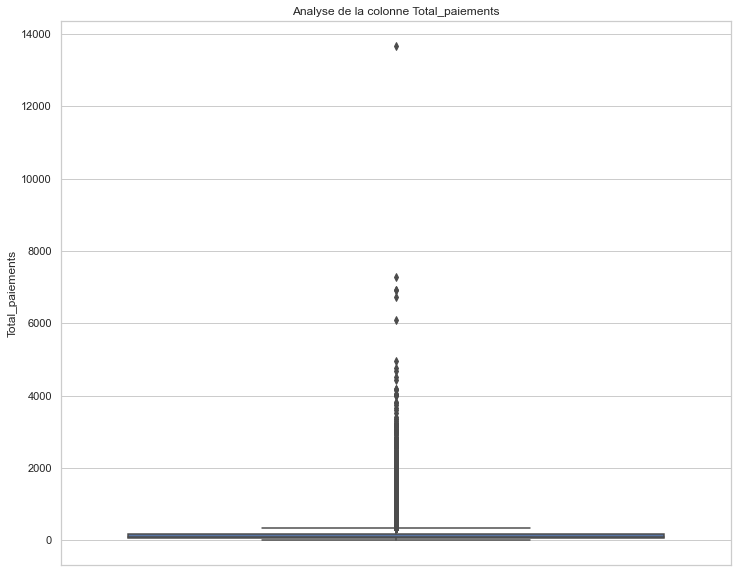

In [58]:
# Boxplot total_paiements

plt.figure(figsize = (12,10))
sns.boxplot(y = data_etat['Total_paiements'], data = data_etat)
plt.title('Analyse de la colonne Total_paiements')

Cette colonne présente le montant dépensé par les clients.
Etant sur une fréquence d'achats faible (moyenne de 1.03 achats), les montants sont assez faibles.

Quelques valeurs ressortent avec des montants supérieurs à 5000.
Nous allons également prendre la décision de conserver ces valeurs pour notre modélisation.

### 4. Analyse statistiques

In [59]:
fichier1.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,96211.0,1.005478,0.074369,1.00,1.00,1.00,1.00,3.00
review_score,95568.0,4.156608,1.283189,1.00,4.00,5.00,5.00,5.00
payment_sequential,96211.0,1.044298,0.369410,1.00,1.00,1.00,1.00,26.00
payment_installments,96211.0,1.044298,0.369410,1.00,1.00,1.00,1.00,26.00
Total_paiements,96211.0,160.510035,219.704992,9.59,62.05,105.41,177.03,13664.08


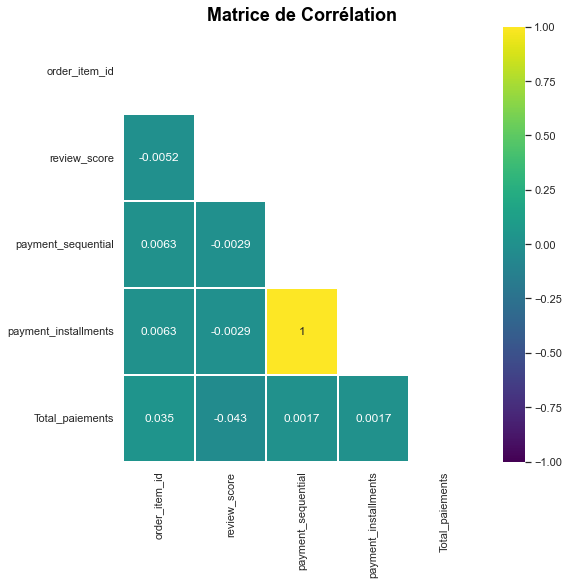

In [60]:
# Analyse corrélation de nos variables

correlation = fichier1.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

plt.figure (figsize = (8,8))
ax = sns.heatmap(correlation, mask=mask, vmin=-1, cmap='viridis', linewidth = 0.2, annot = True)
plt.title('Matrice de Corrélation', fontdict=title)
plt.show()

## IV. Agrégation et finalisation 

### 1. Agrégation en fonction des commandes

In [61]:
fichier_maintenance = fichier1.groupby(['customer_unique_id','order_id', 'order_purchase_timestamp'], as_index = False).agg({'order_item_id': 'sum',
                                   'review_score': 'mean',
                                   'Total_paiements': 'sum'})

In [62]:
# Création de la variable Récence

fichier_maintenance["order_purchase_timestamp"] = pd.to_datetime(fichier_maintenance["order_purchase_timestamp"]).dt.date
DateMax = fichier_maintenance["order_purchase_timestamp"].max()
fichier_maintenance['recency'] = (DateMax - fichier_maintenance["order_purchase_timestamp"]).dt.days + 1


In [63]:
fichier_maintenance

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,review_score,Total_paiements,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10,1.0,5.0,141.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07,1.0,4.0,27.19,115
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10,1.0,3.0,86.22,538
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12,1.0,4.0,43.62,322
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14,1.0,5.0,196.89,289
...,...,...,...,...,...,...,...
96206,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08,1.0,5.0,2067.42,448
96207,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10,1.0,4.0,84.58,263
96208,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07,1.0,5.0,112.46,569
96209,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02,1.0,5.0,133.69,120


<AxesSubplot:>

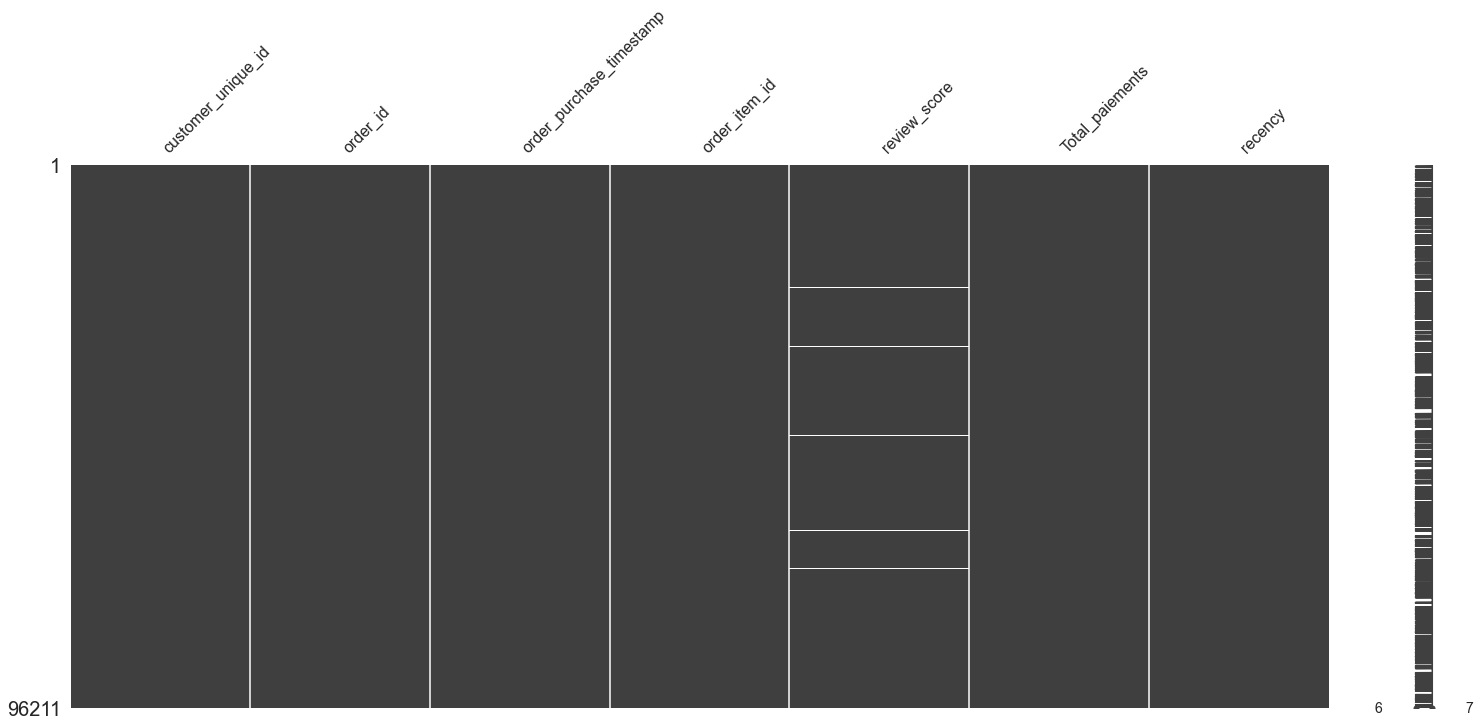

In [64]:
# Analyse valeurs manquantes

msno.matrix(fichier_maintenance)

In [65]:
# Traitement des données manquantes

fichier_maintenance['review_score'].fillna(value=fichier_maintenance['review_score'].mean(), inplace=True)

In [66]:
#Exportation du jeu de données pour la maintenance

fichier_maintenance.to_csv("fichier_maintenance.csv",header=True,index=False)

# 

### 2. Agrégation en fonction des clients

In [67]:
# AGREGER EN FONCTION DES CLIENTS

data_modelisation = fichier_maintenance.groupby(["customer_unique_id"], as_index = False).agg(
    {'review_score': 'mean',
     'Total_paiements': 'sum',
     'recency': 'min',
     'order_id' : 'nunique'})

data_modelisation

,customer_unique_id,review_score,Total_paiements,recency,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,141.90,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,27.19,115,1
2,0000f46a3911fa3c0805444483337064,3.0,86.22,538,1
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,43.62,322,1
4,0004aac84e0df4da2b147fca70cf8255,5.0,196.89,289,1
...,...,...,...,...,...
93099,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,2067.42,448,1
93100,fffea47cd6d3cc0a88bd621562a9d061,4.0,84.58,263,1
93101,ffff371b4d645b6ecea244b27531430a,5.0,112.46,569,1
93102,ffff5962728ec6157033ef9805bacc48,5.0,133.69,120,1


1     90315
2      2562
3       180
4        28
5         9
6         5
7         3
9         1
15        1
Name: order_id, dtype: int64


Text(0.5, 1.0, 'Représentation du dernier achat des clients')

<Figure size 720x576 with 0 Axes>

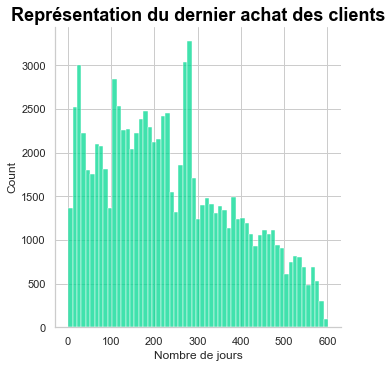

In [68]:
print(data_modelisation['order_id'].value_counts())

plt.figure(figsize=(10,8))
sns.displot(x = data_modelisation["recency"], data = data_modelisation, color="#00d992")
plt.xlabel('Nombre de jours')
plt.title('Représentation du dernier achat des clients',
         fontdict = title)

Cette colonne représente la fréquence d'achats de nos clients.
Nous avions constaté qu'une grande partie de ces derniers n'effectuent qu'un seul achat tandis qu'une faible partie effectuent plusieurs achats.

Après analyse, le client ayant effectué 15 achats a effectué de petites opérations.
Bien que cette valeur semble atypique vis à vis de la fréquence, nous allons prendre la décision de garder ce dernier pour notre modélisation.

In [69]:
#Exportation du jeu de données pour la modélisation

data_modelisation.to_csv("data_modelisation.csv",header=True,index=False)

Nous avons procédé à la finalisation de notre préparation des données pour la partie maintenance mais également pour la modélisation.

Afin d'effectuer cette préparation, nous avons commencé par une analyse des différents fichiers fournis, cela a permis d'en retirer des données pertinentes et de préparer une sélection des variables pertinentes.

Ensuite, nous avons analysé les colonnes que nous avons conservé pour étudier leur rôle mais aussi leur impact dans le comportement de la clientèle. Cette méthode nous a conforté dans notre vision de la méthode RFM tout en y incorporant la moyenne des commentaires clients.

Nous avons finalisé notre préparation des données à travers une agrégation des données en fonction des commandes puis une seconde agrégation en fonction des clients pour la modélisation.